# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Read Dataset

In [ ]:
df=pd.read_csv("/content/Form.csv")

In [ ]:
df.head() # View First 5 rows

,طابع زمني,Name,الجنس,كم مرة تقريبًا واجهت ازدحامًا مروريًا بسبب حادث في الشهر الماضي؟,"""عند ذهابك إلى دوامك وتصادفك زحمة مرورية، ما هو السبب الذي تعتقد أنه \n أدى إلى هذه الزحمة؟""",ما هو حجم الازدحام المروري عند وقوع الحادث؟,ما هو برأيك العامل الأكثر تأثيرًا في حدوث الازدحام المروري بعد الحوادث؟,ما هو الوقت التقريبي الذي تستغرقه عادة لتجاوز الازدحام المروري الناتج عن حادث؟,ما هو نوع الطريق الذي حدث عليه الحادث؟,ما هي الإجراءات التي تقترحها لتقليل الازدحام المروري الناتج عن الحوادث؟
0,8:07:58 م 2024/08/28,Abdulkarim Moraya,ذكر,NaN,"حادث مروري, ازدحام بسبب توقيت الذروة",كثيف (ازدحام شديد),NaN,NaN,"طريق سريع, طريق رئيسي",NaN
1,8:40:16 م 2024/08/28,Bandar moraya,ذكر,أكثر من 6 مرات,"حادث مروري, أعمال صيانة على الطريق, سيارة معطل...",كثيف (ازدحام شديد),"تأخر في التعامل مع الحوادث, الفضول الزائد من ق...",15-30 دقيقة,"طريق سريع, طريق رئيسي",NaN
2,8:43:45 م 2024/08/28,عبدالله التميمي,ذكر,1-3 مرات,"حادث مروري, أعمال صيانة على الطريق, ازدحام بسب...",متوسط (بعض التأخير),"ضيق الطرق, عدم وجود ممرات طوارئ, تأخر في التعا...",أقل من 15 دقيقة,"طريق رئيسي, طريق فرعي",وجود طرق احتياطية يمكن استخدامها عند وجود حادث...
3,8:50:02 م 2024/08/28,رتاج العنزي,أنثى,1-3 مرات,"حادث مروري, أعمال صيانة على الطريق, ازدحام بسب...",متوسط (بعض التأخير),"تأخر في التعامل مع الحوادث, الفضول الزائد من ق...",15-30 دقيقة,"طريق سريع, طريق رئيسي",إدارة الحوادث بشكل سريع عن طريق الاستجابه السر...
4,8:59:15 م 2024/08/28,Fai,أنثى,أكثر من 6 مرات,"أعمال صيانة على الطريق, ازدحام بسبب توقيت الذر...",متوسط (بعض التأخير),"عدم وجود ممرات طوارئ, الفضول الزائد من قبل قائ...",أقل من 15 دقيقة,طريق رئيسي,NaN


In [ ]:
df.columns # Views columns names

Index(['طابع زمني', 'Name', 'الجنس',
       'كم مرة تقريبًا واجهت ازدحامًا مروريًا بسبب حادث في الشهر الماضي؟',
       '  "عند ذهابك إلى دوامك وتصادفك زحمة مرورية، ما هو السبب الذي تعتقد أنه \n أدى إلى هذه الزحمة؟"  ',
       '   ما هو حجم الازدحام المروري عند وقوع الحادث؟  ',
       'ما هو برأيك العامل الأكثر تأثيرًا في حدوث الازدحام المروري بعد الحوادث؟',
       ' ما هو الوقت التقريبي الذي تستغرقه عادة لتجاوز الازدحام المروري الناتج عن حادث؟',
       '  ما هو نوع الطريق الذي حدث عليه الحادث؟  ',
       'ما هي الإجراءات التي تقترحها لتقليل الازدحام المروري الناتج عن الحوادث؟'],
      dtype='object')

# Preprocess Text

In [ ]:
# Define a list of common Arabic prepositions
arabic_prepositions = ['من', 'إلى','الى', 'عن', 'مع','او','على', 'في', 'ب', 'ك', 'ل', 'و', 'حتى', 'خلال', 'حول', 'تحت', 'فوق', 'بين', 'بعد', 'قبل']

# Funtction to preprocess the text
def preprocess_arabic_text(text):
    # Split the text into words
    words = text.split()

    # Remove prepositions from the text
    filtered_words = [word for word in words if word not in arabic_prepositions]

    # Rejoin the filtered words into a cleaned string
    cleaned_text = " ".join(filtered_words)

    return cleaned_text

# Apply preprocessing to text
text_column = df['ما هي الإجراءات التي تقترحها لتقليل الازدحام المروري الناتج عن الحوادث؟'].dropna().astype(str)
cleaned_text_column = text_column.apply(preprocess_arabic_text)

# Combine the cleaned text into one string
combined_cleaned_text = " ".join(cleaned_text_column)

# Word Cloud For Text

<Figure size 1200x800 with 0 Axes>

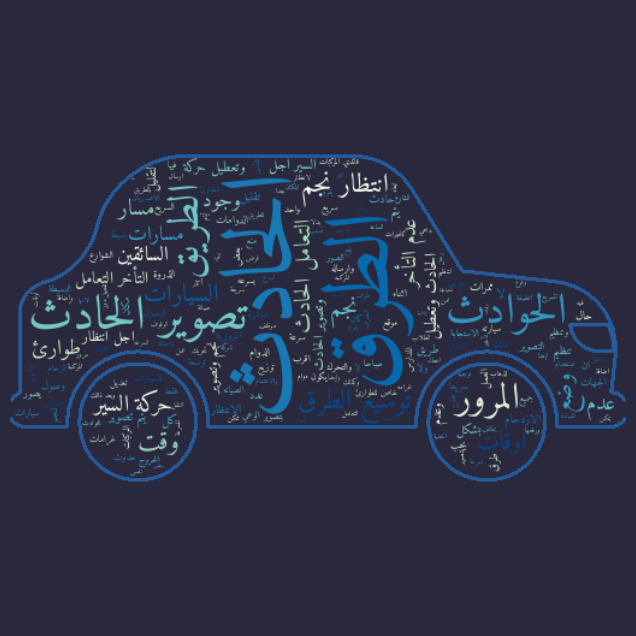

In [ ]:
car_mask = np.array(Image.open("/content/car.png")) # Open image car

font_path = '/content/Amiri-Regular.ttf' # add Arabic font

# Define Word cloud
wordcloud = WordCloud(
    font_path=font_path,
    background_color="#2A283D",
    mask=car_mask,
    contour_width=3,
    contour_color='#255b9b',
    colormap='GnBu',
).generate(combined_cleaned_text)

plt.figure(figsize=(12, 8), facecolor='#2A283D')  # Set the figure background color, and size

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()